In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import os
import gc

In [2]:
application_train = pd.read_csv('application_train.csv')

application_train = application_train[0:50000]
temp_final = application_train

FileNotFoundError: [Errno 2] No such file or directory: 'application_train.csv'

In [8]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
application_train.shape

(50000, 122)

In [10]:
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
application_train.isnull().mean().sort_values(ascending = False)

COMMONAREA_MEDI             0.69922
COMMONAREA_AVG              0.69922
COMMONAREA_MODE             0.69922
NONLIVINGAPARTMENTS_MODE    0.69430
NONLIVINGAPARTMENTS_AVG     0.69430
                             ...   
NAME_HOUSING_TYPE           0.00000
NAME_FAMILY_STATUS          0.00000
NAME_EDUCATION_TYPE         0.00000
NAME_INCOME_TYPE            0.00000
SK_ID_CURR                  0.00000
Length: 122, dtype: float64

In [13]:
Null_columns = pd.DataFrame(application_train.isnull().mean())
Null_columns.reset_index(inplace=True)
Null_columns.columns=['columns','corr']
# Null_columns = Null_columns[Null_columns['0']<.5]
Null_columns = Null_columns[Null_columns['corr']<0.5]
columns_final = Null_columns['columns']

In [14]:
application_train = application_train[columns_final]
application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,157872,0,Cash loans,M,N,N,0,126000.0,1125000.0,47794.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
49996,157873,0,Cash loans,M,N,N,1,112500.0,900000.0,26316.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
49997,157874,0,Cash loans,F,N,Y,0,270000.0,820638.0,34897.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
49998,157875,0,Cash loans,F,N,Y,0,117000.0,254700.0,14751.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
for col in application_train.columns:
    if(application_train[col].dtype=='int64' or application_train[col].dtype=='float64'):
        application_train[col].fillna(application_train[col].mean(), inplace = True)

application_train['EXT_SOURCE_1']=temp_final['EXT_SOURCE_1']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\nbhav\AppData\Local\Temp/ipykernel_24304/2355106572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train['EXT_SOURCE_1']=temp_final['EXT_SOURCE_1']


### Distribution of target

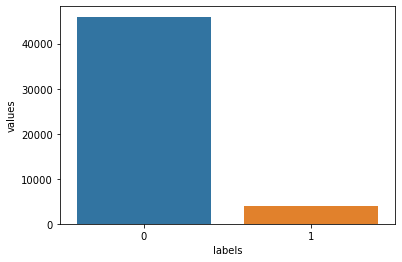

In [16]:
temp = pd.DataFrame({'labels': application_train["TARGET"].value_counts().index,
                   'values': application_train["TARGET"].value_counts().values})

sns.barplot(x = 'labels',y = 'values',data = temp)
plt.show()

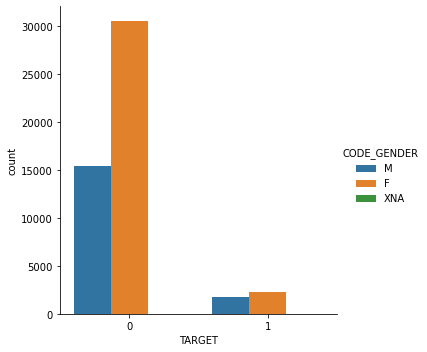

In [17]:
sns.catplot(x = 'TARGET',hue="CODE_GENDER", kind="count", data=application_train)

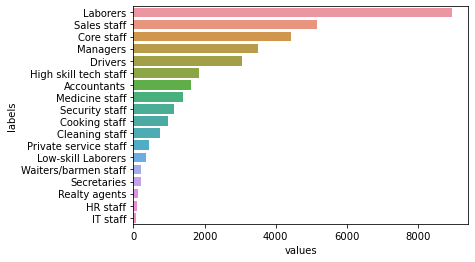

In [18]:
temp = pd.DataFrame({'labels': application_train["OCCUPATION_TYPE"].value_counts().index,
                     'values': application_train["OCCUPATION_TYPE"].value_counts().values})
sns.barplot(y = 'labels', x='values',data = temp)
plt.show()

In [19]:
# temp_occupation = pd.DataFrame(application_train.groupby(by=['OCCUPATION_TYPE','TARGET'])[''].count())
application_train['OCCUPATION_TYPE'].value_counts()> 1500

Laborers                  True
Sales staff               True
Core staff                True
Managers                  True
Drivers                   True
High skill tech staff     True
Accountants               True
Medicine staff           False
Security staff           False
Cooking staff            False
Cleaning staff           False
Private service staff    False
Low-skill Laborers       False
Waiters/barmen staff     False
Secretaries              False
Realty agents            False
HR staff                 False
IT staff                 False
Name: OCCUPATION_TYPE, dtype: bool

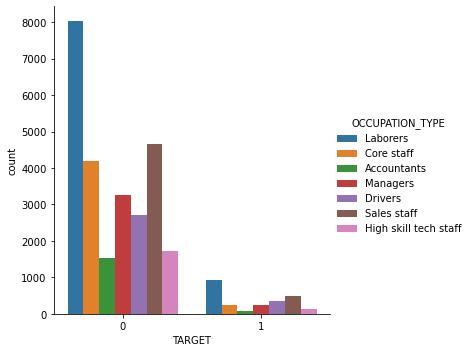

In [20]:
temp_occupation = application_train.loc[application_train['OCCUPATION_TYPE'].isin(['Laborers', 'Sales staff', 'Core staff','Managers','Drivers','High skill tech staff','Accountants'])]
sns.catplot(x = 'TARGET',hue="OCCUPATION_TYPE", kind="count", data=temp_occupation)

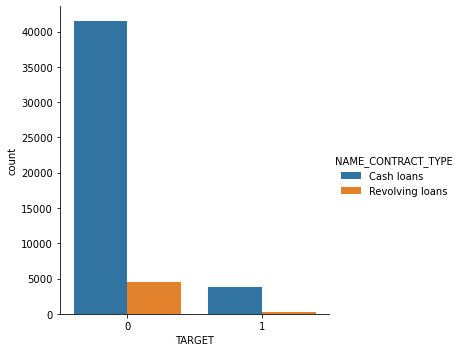

In [21]:
sns.catplot(x = 'TARGET',hue="NAME_CONTRACT_TYPE", kind="count", data=application_train)

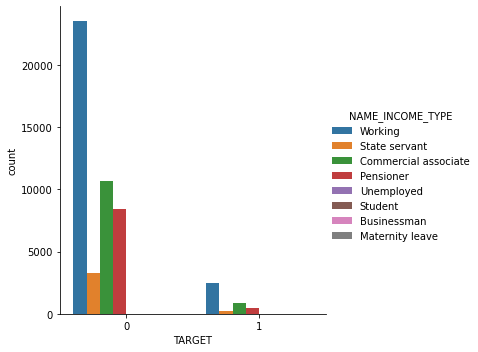

In [22]:
sns.catplot(x = 'TARGET',hue="NAME_INCOME_TYPE", kind="count", data=application_train)

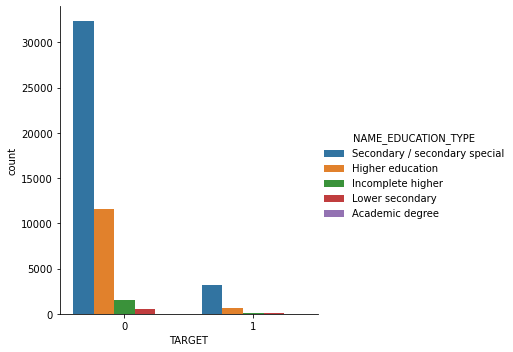

In [23]:
sns.catplot(x = 'TARGET',hue="NAME_EDUCATION_TYPE", kind="count", data=application_train)

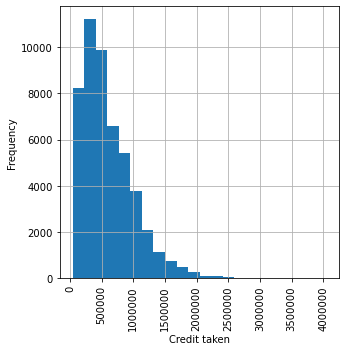

In [24]:
minimum = int(application_train['AMT_CREDIT'].min())
maximum = int(application_train['AMT_CREDIT'].max())  
n = application_train['AMT_CREDIT'].quantile(.1)
x = int((maximum-minimum)/n)
application_train['AMT_CREDIT'].hist(bins=x,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Credit taken')
plt.ylabel("Frequency");

(0.0, 1000000.0)

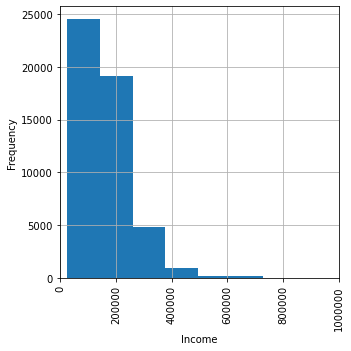

In [25]:
minimum = int(application_train['AMT_INCOME_TOTAL'].min())
maximum = int(application_train['AMT_INCOME_TOTAL'].max())  
n = application_train['AMT_INCOME_TOTAL'].quantile(.5)
x = int((maximum-minimum)/n)
application_train['AMT_INCOME_TOTAL'].hist(bins=1000,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Income')
plt.ylabel("Frequency");
plt.xlim(0, 1000000)

C:\Users\nbhav\AppData\Local\Temp/ipykernel_24304/3048218034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Age'] = application_train['DAYS_BIRTH']*-1/365


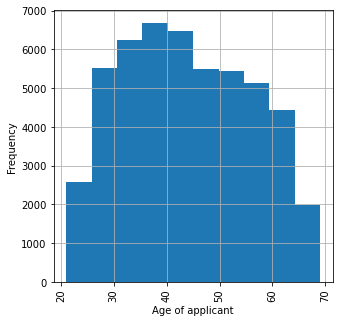

In [26]:
temp = application_train
temp['Age'] = application_train['DAYS_BIRTH']*-1/365
minimum = int(temp['Age'].min())
maximum = int(temp['Age'].max())  
n = temp['Age'].quantile(.1)
x = int((maximum-minimum)/n)
temp['Age'].hist(bins=10,figsize=(5,5),xrot=90).ticklabel_format(style='plain')
plt.xlabel('Age of applicant')
plt.ylabel("Frequency");

In [27]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in application_train:
    if application_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(application_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(application_train[col])
            # Transform both training and testing data
            application_train[col] = le.transform(application_train[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


C:\Users\nbhav\AppData\Local\Temp/ipykernel_24304/3080749731.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_train[col] = le.transform(application_train[col])


In [28]:
application_train = pd.get_dummies(application_train)

print('Training Features shape: ', application_train.shape)

Training Features shape:  (50000, 193)


In [29]:
train_labels = application_train['TARGET']

print('Training Features shape: ', application_train.shape)

Training Features shape:  (50000, 193)


In [30]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    50000.000000
mean        43.896192
std         11.948995
min         21.041096
25%         33.914384
50%         43.098630
75%         53.819178
max         68.997260
Name: DAYS_BIRTH, dtype: float64

In [31]:
application_train['DAYS_EMPLOYED'].describe()

count     50000.000000
mean      63218.143580
std      140793.489022
min      -17531.000000
25%       -2786.000000
50%       -1221.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

The maximum value (besides being positive) is about 1000 years! That doesn't look right! 

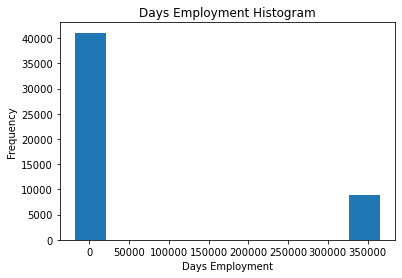

In [32]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [33]:
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.58% of loans
The anomalies default on 5.64% of loans
There are 8924 anomalous days of employment


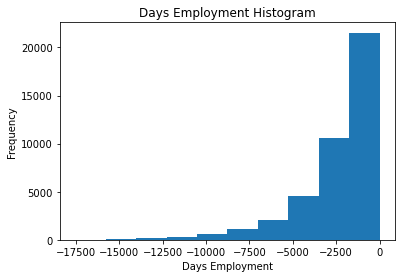

In [34]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

application_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [35]:
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(20))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032264
OCCUPATION_TYPE_Laborers                             0.038188
REG_CITY_NOT_LIVE_CITY                               0.038749
FLAG_EMP_PHONE                                       0.041406
DEF_30_CNT_SOCIAL_CIRCLE                             0.041560
DAYS_REGISTRATION                                    0.042334
DEF_60_CNT_SOCIAL_CIRCLE                             0.044210
FLAG_DOCUMENT_3                                      0.045046
DAYS_ID_PUBLISH                                      0.046925
REG_CITY_NOT_WORK_CITY                               0.048438
NAME_INCOME_TYPE_Working                             0.053948
NAME_EDUCATION_TYPE_Secondary / secondary special    0.055914
DAYS_LAST_PHONE_CHANGE                               0.056131
CODE_GENDER_M                                        0.058687
REGION_RATING_CLIENT                                 0.066131
REGION_RATING_CLIENT_W_CITY              

### Feature Engineering

In [36]:
poly_features = application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED','TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)

In [37]:
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (50000, 21)


In [38]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_EMPLOYED','DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_EMPLOYED',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_EMPLOYED',
 'EXT_SOURCE_2 DAYS_BIRTH']

In [39]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_EMPLOYED','DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3   -0.194199
EXT_SOURCE_1 EXT_SOURCE_3   -0.167388
EXT_SOURCE_1 EXT_SOURCE_2   -0.165564
EXT_SOURCE_3                -0.159550
EXT_SOURCE_2                -0.158265
EXT_SOURCE_2^2              -0.146820
EXT_SOURCE_3^2              -0.144592
EXT_SOURCE_1                -0.099736
EXT_SOURCE_1^2              -0.090331
DAYS_EMPLOYED^2             -0.075400
Name: TARGET, dtype: float64
EXT_SOURCE_1 DAYS_EMPLOYED    0.103650
EXT_SOURCE_3 DAYS_EMPLOYED    0.151375
EXT_SOURCE_2 DAYS_EMPLOYED    0.154554
TARGET                        1.000000
1                                  NaN
Name: TARGET, dtype: float64


In [40]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = application_train['SK_ID_CURR'] 
poly_features = poly_features.drop(columns = ['TARGET','1'])
application_train_final = application_train[['SK_ID_CURR','NAME_EDUCATION_TYPE_Higher education','CODE_GENDER_F','REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH','CODE_GENDER_M','DAYS_LAST_PHONE_CHANGE'
         ,'NAME_INCOME_TYPE_Working','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']]
application_train_poly = application_train_final.merge(poly_features, on = 'SK_ID_CURR', how = 'left')
# Print out the new shapes
#print('Training data with polynomial features shape: ', application_train_poly.shape)
print('Training data with polynomial features shape: ', application_train_poly.shape)


Training data with polynomial features shape:  (50000, 30)


In [41]:
application_train_poly = application_train_poly.drop(columns = ['SK_ID_CURR'])

In [42]:
from sklearn.preprocessing import MinMaxScaler

train = imputer.fit_transform(application_train_poly)

scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(train)

train_scaled = pd.DataFrame(scaler.transform(train), columns=application_train_poly.columns)

print('Training data shape: ', train.shape)

Training data shape:  (50000, 29)


In [43]:
target = application_train['TARGET']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, target, test_size=0.3, random_state=30)


### Logistic Regression

Confusion Matrix : 
        0  1
0  13788  0
1   1212  0
Test accuracy =  91.92 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13788
           1       0.00      0.00      0.00      1212

    accuracy                           0.92     15000
   macro avg       0.46      0.50      0.48     15000
weighted avg       0.84      0.92      0.88     15000

AUC Tree for Logistic:	0.7304789715263955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


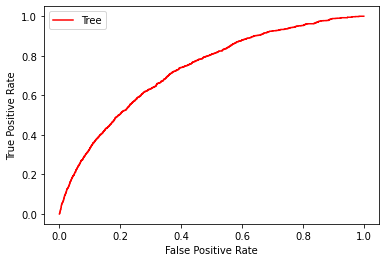

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)


# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(X_train, Y_train)

log_reg_pred = log_reg.predict(X_test)

prediction = list(map(round, log_reg_pred))

# confusion matrix
cm = confusion_matrix(Y_test, prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
Test_accuracy = accuracy_score(Y_test, prediction)
print('Test accuracy = ', Test_accuracy*100,"%")
print(classification_report(Y_test, prediction))

predictedTree = log_reg.predict_proba(X_test)[:,1]


print(f'AUC Tree for Logistic:\t{roc_auc_score(Y_test, predictedTree)}')
fpTreeL, tpTreeL, threshTreeL = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeL, tpTreeL,'r',label = 'Tree')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Forest Classifier

Confusion Matrix : 
        0   1
0  13745  43
1   1185  27
Test accuracy =  91.81333333333333 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13788
           1       0.39      0.02      0.04      1212

    accuracy                           0.92     15000
   macro avg       0.65      0.51      0.50     15000
weighted avg       0.88      0.92      0.88     15000

AUC Tree for Random Forest:	0.7005428023220076


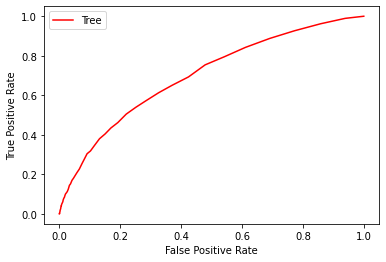

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 0, n_jobs = -1)
random_forest.fit(X_train, Y_train)

random_forest_pred = random_forest.predict(X_test)

prediction = list(map(round, random_forest_pred))
cm = confusion_matrix(Y_test, prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
 
# accuracy score of the model
Test_accuracy = accuracy_score(Y_test, prediction)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, prediction))

predictedTree = random_forest.predict_proba(X_test)[:,1]


print(f'AUC Tree for Random Forest:\t{roc_auc_score(Y_test, predictedTree)}')
fpTreeR, tpTreeR, threshTreeR = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeR, tpTreeR,'r',label = 'Tree')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Confusion Matrix : 
        0     1
0  12624  1164
1   1001   211
Test accuracy =  85.56666666666666 %
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     13788
           1       0.15      0.17      0.16      1212

    accuracy                           0.86     15000
   macro avg       0.54      0.54      0.54     15000
weighted avg       0.86      0.86      0.86     15000

AUC Tree for Decision Tree:	0.5448355866918285


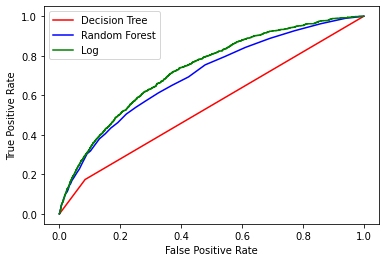

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train, Y_train)
decision_model_pred = decision_model.predict(X_test)

dec_prediction = list(map(round, decision_model_pred))
from sklearn.metrics import roc_curve
# accuracy score of the model
cm = confusion_matrix(Y_test, dec_prediction)
cm=pd.DataFrame(cm)
print ("Confusion Matrix : \n", cm)
Test_accuracy = accuracy_score(Y_test, dec_prediction)
print('Test accuracy = ', Test_accuracy*100,"%")

print(classification_report(Y_test, dec_prediction))

predictedTree = decision_model.predict_proba(X_test)[:,1]

print(f'AUC Tree for Decision Tree:\t{roc_auc_score(Y_test, predictedTree)}')

fpTreeD, tpTreeD, threshTreeD = roc_curve(Y_test, predictedTree)

plt.plot(fpTreeD, tpTreeD,'r',label = 'Decision Tree')
plt.plot(fpTreeR, tpTreeR,'b',label = 'Random Forest')
plt.plot(fpTreeL, tpTreeL,'g',label = 'Log')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.svm import SVC, NuSVC, LinearSVC

clf1 = SVC(1.0, probability=True)
#clf2 = NuSVC()
#linSVC = LinearSVC(1, probability=True)

for clf in [clf1]:
    clf.fit(X_train, Y_train)                         
    predicted= np.array(clf.predict(X_test))
    cm = confusion_matrix(Y_test, predicted,labels=[1,0])
    cm=pd.DataFrame(cm)
    print ("Confusion Matrix : \n", cm)
    print("accuracy:", accuracy_score(Y_test, predicted)*100)
    test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, predicted)
    predictedTree = clf.predict_proba(X_test)[:,1]

    print(f'AUC Tree for SVM:\t{roc_auc_score(Y_test, predictedTree)}')

In [ ]:
import sklearn.neural_network
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=100, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)
    # Train the model on the whole data set
model.fit(X_train, Y_train)
print('\n---- Test data ----')
predictions = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test, predictions))
predictedTree = model.predict_proba(X_test)[:,1]

print(f'AUC Tree:\t{roc_auc_score(Y_test, predictedTree)}')

# fpTreeN, tpTreeN, threshTreeN = roc_curve(Y_test, predictedTree)

# plt.plot(fpTreeD, tpTreeD,'r',label = 'Decision Tree')
# plt.plot(fpTreeN, fpTreeN,'b',label = 'Neural Net')
# plt.plot(fpTreeL, tpTreeL,'g',label = 'Log')
# plt.legend()
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()